> This is one of the 100 recipes of the [IPython Cookbook](http://ipython-books.github.io/), the definitive guide to high-performance scientific computing and data science in Python.


Links:

 * http://mrob.com/pub/comp/xmorphia/F260/F260-k550.html
 * http://mrob.com/pub/comp/xmorphia/
 * https://pmneila.github.io/jsexp/grayscott/

# 12.4. Simulating a Partial Differential Equation: reaction-diffusion systems and Turing patterns

1. Let's import the packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

2. We will simulate the following system of partial differential equations on the domain $E=[-1,1]^2$:

\begin{align*}
\frac{\partial u}{\partial t} &= a \Delta u + u - u^3 - v + k\\
\tau\frac{\partial v}{\partial t} &= b \Delta v + u - v\\
\end{align*}

The variable $u$ represents the concentration of a substance favoring skin pigmentation, whereas $v$ represents another substance that reacts with the first and impedes pigmentation.

At initialization time, we assume that $u$ and $v$ contain independent random numbers on every grid point. Besides, we take **Neumann boundary conditions**: we require the spatial derivatives of the variables with respect to the normal vectors to be null on the boundaries of the domain $E$.

Let's define the four parameters of the model.

In [2]:
#a = 2.8e-4
#b = 5e-3
a=4e-4
b=2e-4
F=0.0180
k=0.0510
#F=0.0260
#k=0.0550

3. We discretize time and space. The following condition ensures that the discretization scheme we use here is stable:

$$dt \leq \frac{dx^2}{2}$$

In [3]:
size = 200  # size of the 2D grid
dx = 2./size  # space step

In [4]:
T = 10.0  # total time
dt = .9 * dx**2/2  # time step
n = int(T/dt)

4. We initialize the variables $u$ and $v$. The matrices $U$ and $V$ contain the values of these variables on the vertices of the 2D grid. These variables are initialized with a uniform noise between $0$ and $1$.

In [5]:
U = np.random.rand(size, size)
V = np.random.rand(size, size)

5. Now, we define a function that computes the discrete Laplace operator of a 2D variable on the grid, using a five-point stencil finite difference method. This operator is defined by:

$$\Delta u(x,y) \simeq \frac{u(x+h,y)+u(x-h,y)+u(x,y+h)+u(x,y-h)-4u(x,y)}{dx^2}$$

We can compute the values of this operator on the grid using vectorized matrix operations. Because of side effects on the edges of the matrix, we need to remove the borders of the grid in the computation.

In [6]:
def laplacian(Z):
    Ztop = Z[0:-2,1:-1]
    Zleft = Z[1:-1,0:-2]
    Zbottom = Z[2:,1:-1]
    Zright = Z[1:-1,2:]
    Zcenter = Z[1:-1,1:-1]
    return (Ztop + Zleft + Zbottom + Zright - 4 * Zcenter) / dx**2

6. Now, we simulate the system of equations using the finite difference method. At each time step, we compute the right-hand sides of the two equations on the grid using discrete spatial derivatives (Laplacians). Then, we update the variables using a discrete time derivative.

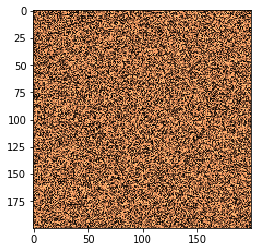

In [7]:
plt.imshow(U,cmap=plt.cm.copper,interpolation='none')

In [8]:
# We simulate the PDE with the finite difference method.
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1,1:-1]
    Vc = V[1:-1,1:-1]
    # We update the variables.
    U[1:-1,1:-1], V[1:-1,1:-1] = \
        Uc + dt * (a * deltaU - Uc*Vc*Vc + F*(1-Uc)), \
        Vc + dt * (b * deltaV + Uc*Vc*Vc - (F+k)*Vc)
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0,:] = Z[1,:]
        Z[-1,:] = Z[-2,:]
        Z[:,0] = Z[:,1]
        Z[:,-1] = Z[:,-2]

7. Finally, we display the variable $u$ after a time $T$ of simulation.

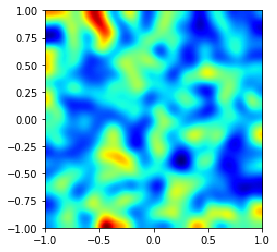

In [9]:
plt.imshow(U, cmap=plt.cm.jet, extent=[-1,1,-1,1],interpolation='none');

Whereas the variables when completely random at initialization time, we observe the formation of patterns after a sufficiently long simulation time.

> You'll find all the explanations, figures, references, and much more in the book (to be released later this summer).

> [IPython Cookbook](http://ipython-books.github.io/), by [Cyrille Rossant](http://cyrille.rossant.net), Packt Publishing, 2014 (500 pages).